In [1]:
pip install adversarial-robustness-toolbox

# **Traiin Model and save correct predicted data in saperate variable**

In [29]:
from keras.datasets import mnist
import numpy as np

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Combine the training and test datasets
all_images = np.concatenate((x_train, x_test))
all_labels = np.concatenate((y_train, y_test))

# Basic info about the dataset
print("Basic Information:")
print(f"Total number of images: {all_images.shape[0]}")
print(f"Size of each image: {all_images.shape[1:]}")
print(f"Number of unique labels: {np.unique(all_labels).size}")

# Count the occurrences of each label in the combined dataset
unique, counts = np.unique(all_labels, return_counts=True)
total_label_counts = dict(zip(unique, counts))

# Display the counts for each label
print("\nDistribution of Labels:")
for label, count in total_label_counts.items():
    print(f"Label {label}: {count}")

# Pixel intensity statistics
print("\nPixel Intensity Statistics:")
pixel_values = all_images.flatten()
print(f"Minimum pixel value: {pixel_values.min()}")
print(f"Maximum pixel value: {pixel_values.max()}")
print(f"Mean pixel value: {pixel_values.mean():.2f}")
print(f"Standard deviation of pixel values: {pixel_values.std():.2f}")

# Check for balance in the dataset
print("\nBalance Check:")
balanced = all(np.array(list(total_label_counts.values())) == list(total_label_counts.values())[0])
print("The dataset is", "balanced" if balanced else "not balanced", "across different labels.")


Basic Information:
Total number of images: 70000
Size of each image: (28, 28)
Number of unique labels: 10

Distribution of Labels:
Label 0: 6903
Label 1: 7877
Label 2: 6990
Label 3: 7141
Label 4: 6824
Label 5: 6313
Label 6: 6876
Label 7: 7293
Label 8: 6825
Label 9: 6958

Pixel Intensity Statistics:
Minimum pixel value: 0
Maximum pixel value: 255
Mean pixel value: 33.39
Standard deviation of pixel values: 78.65

Balance Check:
The dataset is not balanced across different labels.


In [3]:
all_labels.shape

(70000,)

In [30]:
# Import necessary libraries
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
import numpy as np

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Combine the training and test labels
all_labels = np.concatenate((y_train, y_test))

# Count the occurrences of each label in the combined dataset
unique, counts = np.unique(all_labels, return_counts=True)
total_label_counts = dict(zip(unique, counts))

# Display the counts for each label
print("Total label counts for the entire MNIST dataset:")
for label, count in total_label_counts.items():
    print(f"Label {label}: {count}")

# Count the occurrences of each label in the training set
unique, counts = np.unique(y_train, return_counts=True)
train_label_counts = dict(zip(unique, counts))
print("Training set label counts:", train_label_counts)
for label, count in train_label_counts.items():
    print(f"Label {label}: {count}")

# Count the occurrences of each label in the test set
unique, counts = np.unique(y_test, return_counts=True)
test_label_counts = dict(zip(unique, counts))
print("Test set label counts:", test_label_counts)
for label, count in test_label_counts.items():
    print(f"Label {label}: {count}")



# The total number of labels is the number of images, which is the length of the label arrays
total_all_labels_count = len(y_train) + len(y_test)
total_y_train_count = len(y_train)
total_y_test_count = len(y_test)

# Display the total count of images for the entire dataset, training set, and test set
print(f"Total number of images in the entire MNIST dataset: {total_all_labels_count}")
print(f"Total number of images in the training set: {total_y_train_count}")
print(f"Total number of images in the test set: {total_y_test_count}")



Total label counts for the entire MNIST dataset:
Label 0: 6903
Label 1: 7877
Label 2: 6990
Label 3: 7141
Label 4: 6824
Label 5: 6313
Label 6: 6876
Label 7: 7293
Label 8: 6825
Label 9: 6958
Training set label counts: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Label 0: 5923
Label 1: 6742
Label 2: 5958
Label 3: 6131
Label 4: 5842
Label 5: 5421
Label 6: 5918
Label 7: 6265
Label 8: 5851
Label 9: 5949
Test set label counts: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}
Label 0: 980
Label 1: 1135
Label 2: 1032
Label 3: 1010
Label 4: 982
Label 5: 892
Label 6: 958
Label 7: 1028
Label 8: 974
Label 9: 1009
Total number of images in the entire MNIST dataset: 70000
Total number of images in the training set: 60000
Total number of images in the test set: 10000


In [5]:
all_labels.shape

(70000,)

In [6]:
y_train.shape

(60000,)

In [7]:
y_test.shape

(10000,)

In [8]:
# Preprocess the data
# Reshape the data to fit the model
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32') / 255
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

# Define the model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),  # Convolutional layer
    MaxPooling2D(pool_size=(2, 2)),  # Pooling layer
    Flatten(),  # Flatten layer
    Dense(128, activation='relu'),  # Fully connected layer
    Dense(10, activation='softmax'),  # Output layer
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=20, batch_size=200, verbose=2)

# Save the model
model.save('/content/drive/MyDrive/ColabNotebooks/mnist_model.h5')

# Get the model's predictions on the test data
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test_categorical, verbose=0)
print(f'Test accuracy: {accuracy:.3f}')

# Save only the examples that the model identifies correctly
correct_indices = predicted_labels == y_test
correct_examples = x_test[correct_indices]
correct_labels = y_test[correct_indices]

# Save the correct examples and their labels
np.save('/content/drive/MyDrive/ColabNotebooks/correct_examples.npy', correct_examples)
np.save('/content/drive/MyDrive/ColabNotebooks/correct_labels.npy', correct_labels)



Epoch 1/20
300/300 - 42s - loss: 0.2662 - accuracy: 0.9259 - 42s/epoch - 139ms/step
Epoch 2/20
300/300 - 22s - loss: 0.0821 - accuracy: 0.9761 - 22s/epoch - 72ms/step
Epoch 3/20
300/300 - 23s - loss: 0.0552 - accuracy: 0.9838 - 23s/epoch - 76ms/step
Epoch 4/20
300/300 - 21s - loss: 0.0405 - accuracy: 0.9884 - 21s/epoch - 70ms/step
Epoch 5/20
Epoch 6/20
300/300 - 23s - loss: 0.0247 - accuracy: 0.9925 - 23s/epoch - 78ms/step
Epoch 7/20
300/300 - 22s - loss: 0.0186 - accuracy: 0.9948 - 22s/epoch - 72ms/step
Epoch 8/20
300/300 - 22s - loss: 0.0147 - accuracy: 0.9960 - 22s/epoch - 73ms/step
Epoch 9/20
300/300 - 20s - loss: 0.0112 - accuracy: 0.9970 - 20s/epoch - 68ms/step
Epoch 10/20
300/300 - 22s - loss: 0.0081 - accuracy: 0.9980 - 22s/epoch - 73ms/step
Epoch 11/20
300/300 - 22s - loss: 0.0076 - accuracy: 0.9980 - 22s/epoch - 73ms/step
Epoch 12/20
300/300 - 21s - loss: 0.0053 - accuracy: 0.9987 - 21s/epoch - 69ms/step
Epoch 13/20
300/300 - 22s - loss: 0.0050 - accuracy: 0.9987 - 22s/epoch 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 2s 7ms/step
Test accuracy: 0.987


In [9]:
correct_labels.shape

(9865,)

In [10]:
correct_examples.shape

(9865, 28, 28, 1)

In [27]:

# Count the occurrences of each label in the test set
unique, counts = np.unique(correct_labels, return_counts=True)
correct_labels_counts = dict(zip(unique, counts))
print("correct_labels_counts:", correct_labels_counts)
for label, count in correct_labels_counts.items():
    print(f"Label {label}: {count}")

correct_labels_counts: {0: 973, 1: 1130, 2: 1015, 3: 993, 4: 968, 5: 882, 6: 942, 7: 1007, 8: 965, 9: 990}
Label 0: 973
Label 1: 1130
Label 2: 1015
Label 3: 993
Label 4: 968
Label 5: 882
Label 6: 942
Label 7: 1007
Label 8: 965
Label 9: 990


In [33]:
predicted_labels.shape

(10000,)

In [32]:
import numpy as np
import pandas as pd

# Assuming all_labels, y_train, y_test, and correct_labels are defined and loaded appropriately

# Function to count occurrences and return as a dictionary
def count_labels(labels):
    unique, counts = np.unique(labels, return_counts=True)
    return dict(zip(unique, counts))

# Count the occurrences of each label in the combined dataset
total_label_counts = count_labels(all_labels)

# Count the occurrences of each label in the training set
train_label_counts = count_labels(y_train)

# Count the occurrences of each label in the test set
test_label_counts = count_labels(y_test)

# Count the occurrences of each label in the test set
predict_label_counts = count_labels(predicted_labels)

# Count the occurrences of each label in the correct labels
correct_labels_counts = count_labels(correct_labels)

# Create a DataFrame from the dictionaries
label_counts_df = pd.DataFrame({
    'Total MNIST': pd.Series(total_label_counts),
    'Training Set': pd.Series(train_label_counts),
    'Test Set': pd.Series(test_label_counts),
    'Predict Labels': pd.Series(predicted_labels_counts),
    'Correct Labels': pd.Series(correct_labels_counts)
})

# Print the DataFrame
print("Label counts in different datasets:")
print(label_counts_df)

# If you want to save this table to a CSV file
label_counts_df.to_csv('/content/drive/MyDrive/ColabNotebooks/label_counts.csv')


Label counts in different datasets:
   Total MNIST  Training Set  Test Set  Predict Labels  Correct Labels
0         6903          5923       980             984             973
1         7877          6742      1135            1143            1130
2         6990          5958      1032            1034            1015
3         7141          6131      1010             999             993
4         6824          5842       982             977             968
5         6313          5421       892             898             882
6         6876          5918       958             952             942
7         7293          6265      1028            1016            1007
8         6825          5851       974             988             965
9         6958          5949      1009            1009             990


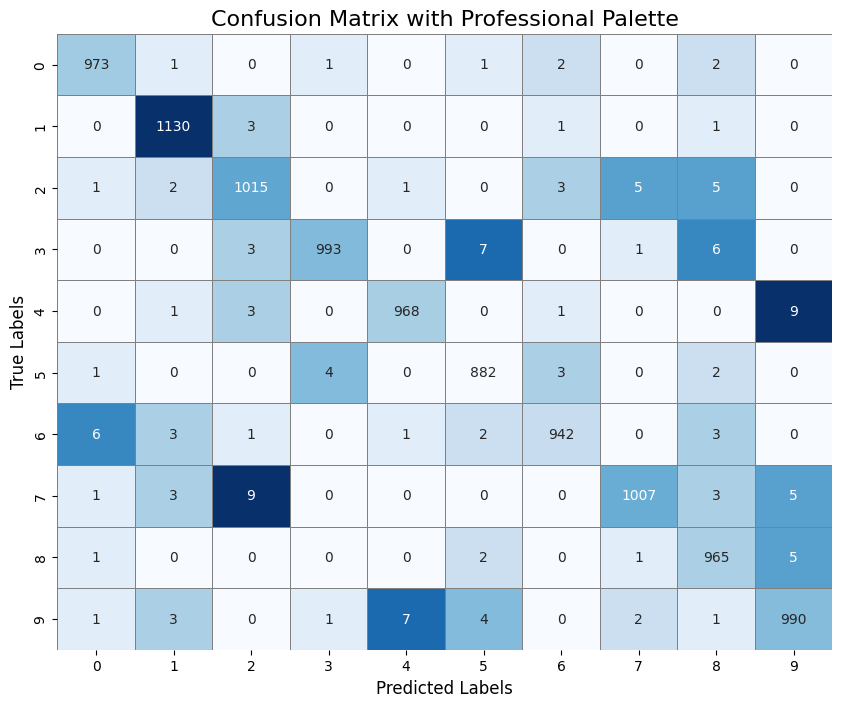

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predicted_labels,labels=range(10))

# Create a mask for the diagonal elements
mask = np.eye(len(cm), dtype=bool)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the heatmap for off-diagonal elements using the mask
# Use a professional color palette like 'Blues'
sns.heatmap(cm, mask=mask, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, linewidths=.5, linecolor='grey')

# Plot the heatmap for diagonal elements using the inverse of the mask
# Use the same color palette for consistency
sns.heatmap(cm, mask=~mask, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, linewidths=.5, linecolor='grey')

# Labels, title and ticks
label_names = [f'{i}' for i in range(10)]
ax.set_xlabel('Predicted Labels', fontsize=12)
ax.set_ylabel('True Labels', fontsize=12)
ax.set_title('Confusion Matrix with Professional Palette', fontsize=16)
ax.set_xticklabels(label_names)
ax.set_yticklabels(label_names)

plt.savefig('model.png', bbox_inches='tight')
plt.show()

In [13]:
predictions.shape

(10000, 10)

In [14]:
# Count the occurrences of each label in the correct_labels
unique, counts = np.unique(predicted_labels, return_counts=True)
predicted_labels_counts = dict(zip(unique, counts))
print("correct_predicted set label counts:", predicted_labels_counts)
for label, count in predicted_labels_counts.items():
    print(f"Label {label}: {count}")

total_predicted_labels_count = len(predicted_labels)

# Display the total count of all labels
print(f"Total count of all total_predicted_labels_count combined in the MNIST dataset: {total_predicted_labels_count}")

correct_predicted set label counts: {0: 984, 1: 1143, 2: 1034, 3: 999, 4: 977, 5: 898, 6: 952, 7: 1016, 8: 988, 9: 1009}
Label 0: 984
Label 1: 1143
Label 2: 1034
Label 3: 999
Label 4: 977
Label 5: 898
Label 6: 952
Label 7: 1016
Label 8: 988
Label 9: 1009
Total count of all total_predicted_labels_count combined in the MNIST dataset: 10000


In [15]:
# Count the occurrences of each label in the correct_labels
unique, counts = np.unique(correct_labels, return_counts=True)
correct_labels_counts = dict(zip(unique, counts))
print("Test set label counts:", correct_labels_counts)
for label, count in correct_labels_counts.items():
    print(f"Label {label}: {count}")

total_correct_labels_count = len(correct_labels)

# Display the total count of all labels
print(f"Total count of all total_correct_labels_count combined in the MNIST dataset: {total_correct_labels_count}")

Test set label counts: {0: 973, 1: 1130, 2: 1015, 3: 993, 4: 968, 5: 882, 6: 942, 7: 1007, 8: 965, 9: 990}
Label 0: 973
Label 1: 1130
Label 2: 1015
Label 3: 993
Label 4: 968
Label 5: 882
Label 6: 942
Label 7: 1007
Label 8: 965
Label 9: 990
Total count of all total_correct_labels_count combined in the MNIST dataset: 9865


In [16]:
correct_labels.shape

(9865,)

# **FastGradientMethod**

**Load the saved examples
Choose  attack FGM
Apply without target,with target, muktiple attacks without target and with target**




In [17]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from keras.models import load_model
from art.attacks.evasion import FastGradientMethod
from art.estimators.classification import KerasClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Load your trained model
model = load_model('/content/drive/MyDrive/ColabNotebooks/mnist_model.h5')

# Load the saved correct examples and their labels
correct_examples = np.load('/content/drive/MyDrive/ColabNotebooks/correct_examples.npy')
correct_labels = np.load('/content/drive/MyDrive/ColabNotebooks/correct_labels.npy')

# Preprocess the examples
correct_examples = correct_examples.astype('float32') / 255

# Wrap the model with ART KerasClassifier
classifier = KerasClassifier(model=model, clip_values=(0, 1))

# Define the attack
attack = FastGradientMethod(classifier, eps=0.1)

# Apply the attack to generate adversarial examples
x_adv = attack.generate(x=correct_examples)

# Predict the labels of the adversarial examples
y_adv = np.argmax(classifier.predict(x_adv), axis=1)




/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [18]:
unique, counts = np.unique(y_adv, return_counts=True)
y_adv_counts = dict(zip(unique, counts))
for label, count in y_adv_counts.items():
    print(f"Label {label}: {count}")

total_y_adv_count = len(y_adv)

# Display the total count of all labels
print(f"Total count of all total_predicted_labels_count combined in the MNIST dataset: {total_y_adv_count}")

Label 1: 1
Label 5: 9863
Label 7: 1
Total count of all total_predicted_labels_count combined in the MNIST dataset: 9865


In [19]:
correct_examples.shape


(9865, 28, 28, 1)

In [20]:
y_adv.shape

(9865,)

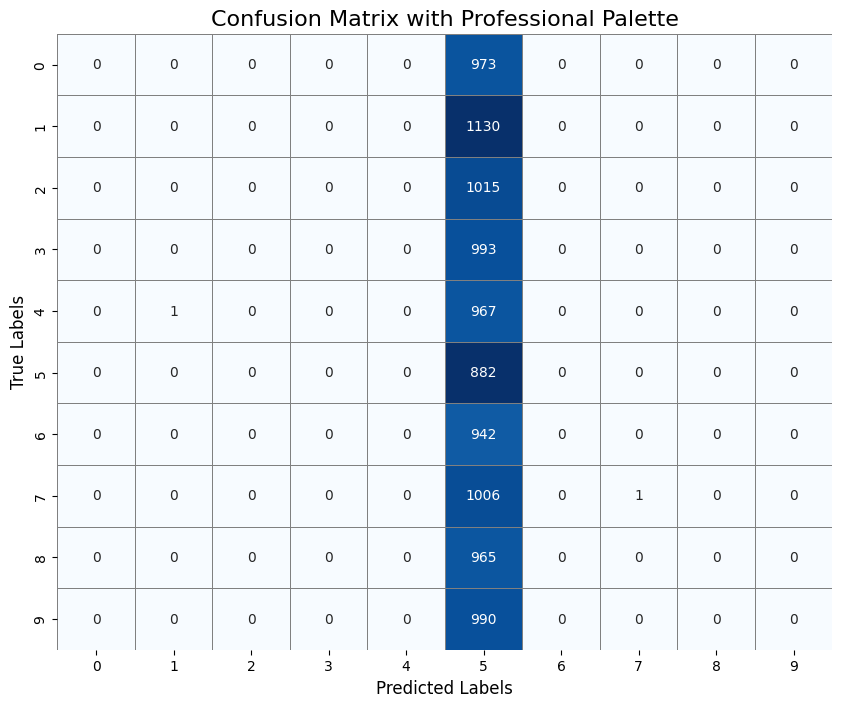

In [21]:
# Calculate the confusion matrix
cm = confusion_matrix(correct_labels, y_adv, labels=range(10))

# Draw the confusion matrix
# Create a mask for the diagonal elements
mask = np.eye(len(cm), dtype=bool)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the heatmap for off-diagonal elements using the mask
# Use a professional color palette like 'Blues'
sns.heatmap(cm, mask=mask, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, linewidths=.5, linecolor='grey')

# Plot the heatmap for diagonal elements using the inverse of the mask
# Use the same color palette for consistency
sns.heatmap(cm, mask=~mask, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, linewidths=.5, linecolor='grey')

# Labels, title and ticks
label_names = [f'{i}' for i in range(10)]
ax.set_xlabel('Predicted Labels', fontsize=12)
ax.set_ylabel('True Labels', fontsize=12)
ax.set_title('Confusion Matrix with Professional Palette', fontsize=16)
ax.set_xticklabels(label_names)
ax.set_yticklabels(label_names)
plt.savefig('FGM_without_target.png', bbox_inches='tight')
plt.show()

In [22]:
import numpy as np
import tensorflow as tf
from keras.models import load_model
from art.attacks.evasion import FastGradientMethod
from art.estimators.classification import KerasClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Disable eager execution (necessary for ART with TensorFlow v1)
tf.compat.v1.disable_eager_execution()

# Load your trained model
model = load_model('/content/drive/MyDrive/ColabNotebooks/mnist_model.h5')

# Load the saved correct examples and their labels
correct_examples = np.load('/content/drive/MyDrive/ColabNotebooks/correct_examples.npy')
correct_labels = np.load('/content/drive/MyDrive/ColabNotebooks/correct_labels.npy')

# Preprocess the examples
correct_examples = correct_examples.astype('float32') / 255

# Wrap the model with ART KerasClassifier
classifier = KerasClassifier(model=model, clip_values=(0, 1))

# Define the range of eps values
eps_range = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

# Initialize a DataFrame to store results
results_df = pd.DataFrame(columns=['eps', 'total_correct', 'total_adv', 'correct_adv_counts'])

# Loop over the eps values
for eps in eps_range:
    # Define the attack with the current eps
    attack = FastGradientMethod(classifier, eps=eps)

    # Apply the attack to generate adversarial examples
    x_adv = attack.generate(x=correct_examples)

    # Predict the labels of the adversarial examples
    y_adv = np.argmax(classifier.predict(x_adv), axis=1)

    # Count the occurrences of each label in the adversarial predictions
    unique_adv, counts_adv = np.unique(y_adv, return_counts=True)
    adv_counts = dict(zip(unique_adv, counts_adv))

    # Calculate the confusion matrix
    cm = confusion_matrix(correct_labels, y_adv, labels=range(10))

    # Draw and save the confusion matrix
    fig, ax = plt.subplots(figsize=(10, 8))

    # Create a mask for the diagonal elements
    mask = np.eye(len(cm), dtype=bool)

    # Plot the heatmap for off-diagonal elements using the mask
    # Use a professional color palette like 'Blues'
    sns.heatmap(cm, mask=mask, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, linewidths=.5, linecolor='grey')

    # Plot the heatmap for diagonal elements using the inverse of the mask
    # Use the same color palette for consistency
    sns.heatmap(cm, mask=~mask, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, linewidths=.5, linecolor='grey')
    # Labels, title and ticks
    label_names = [f'{i}' for i in range(10)]
    ax.set_xlabel('Predicted Labels', fontsize=12)
    ax.set_ylabel('True Labels', fontsize=12)
    ax.set_title(f'Confusion Matrix for eps={eps}', fontsize=16)
    ax.set_xticklabels(label_names)
    ax.set_yticklabels(label_names)


    image_filename = f'confusion_matrix_eps_{eps}.png'
    plt.savefig(image_filename, bbox_inches='tight')
    plt.close(fig)  # Close the figure to avoid displaying it in the notebook

    # Save the results in the DataFrame
    results_df = results_df.append({
        'eps': eps,
        'total_correct': len(correct_labels),
        'total_adv': len(y_adv),
        'correct_adv_counts': adv_counts
    }, ignore_index=True)

# Save the results to a CSV file
results_df.to_csv('/content/drive/MyDrive/ColabNotebooks/adv_results.csv', index=False)

# Print the DataFrame
print(results_df)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
<ipython-input-22-1b110e023548>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-22-1b110e023548>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-22-1b110e023548>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-22-1b110e023548>:78: FutureWarning: The frame.append method is deprecated and will be removed from pa

     eps total_correct total_adv      correct_adv_counts
0   0.01          9865      9865               {1: 9865}
1   0.02          9865      9865      {1: 4068, 5: 5797}
2   0.03          9865      9865       {1: 355, 5: 9510}
3   0.04          9865      9865  {1: 51, 5: 9813, 7: 1}
4   0.05          9865      9865        {1: 12, 5: 9853}
5   0.10          9865      9865   {1: 1, 5: 9863, 7: 1}
6   0.20          9865      9865               {5: 9865}
7   0.30          9865      9865               {5: 9865}
8   0.40          9865      9865               {5: 9865}
9   0.50          9865      9865               {5: 9865}
10  0.60          9865      9865               {5: 9865}


<ipython-input-22-1b110e023548>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [23]:
import numpy as np
import tensorflow as tf
from keras.models import load_model
from art.attacks.evasion import FastGradientMethod
from art.estimators.classification import KerasClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Disable eager execution (necessary for ART with TensorFlow v1)
tf.compat.v1.disable_eager_execution()

# Load your trained model
model = load_model('/content/drive/MyDrive/ColabNotebooks/mnist_model.h5')

# Load the saved correct examples and their labels
correct_examples = np.load('/content/drive/MyDrive/ColabNotebooks/correct_examples.npy')
correct_labels = np.load('/content/drive/MyDrive/ColabNotebooks/correct_labels.npy')

# Preprocess the examples
correct_examples = correct_examples.astype('float32') / 255

# Wrap the model with ART KerasClassifier
classifier = KerasClassifier(model=model, clip_values=(0, 1))

# Define the range of eps values
eps_range = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

# Initialize a DataFrame to store results
results_df = pd.DataFrame(columns=['eps', 'total_correct', 'total_adv', 'correct_adv_counts'])

# Loop over the eps values
for eps in eps_range:
    # Define the attack with the current eps
    attack = FastGradientMethod(classifier, eps=eps)

    # Apply the attack to generate adversarial examples
    x_adv = attack.generate(x=correct_examples ,y=correct_labels)

    # Predict the labels of the adversarial examples
    y_adv = np.argmax(classifier.predict(x_adv), axis=1)

    # Count the occurrences of each label in the adversarial predictions
    unique_adv, counts_adv = np.unique(y_adv, return_counts=True)
    adv_counts = dict(zip(unique_adv, counts_adv))

    # Calculate the confusion matrix
    cm = confusion_matrix(correct_labels, y_adv, labels=range(10))

   # Draw and save the confusion matrix
    fig, ax = plt.subplots(figsize=(10, 8))

    # Create a mask for the diagonal elements
    mask = np.eye(len(cm), dtype=bool)

    # Plot the heatmap for off-diagonal elements using the mask
    # Use a professional color palette like 'Blues'
    sns.heatmap(cm, mask=mask, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, linewidths=.5, linecolor='grey')

    # Plot the heatmap for diagonal elements using the inverse of the mask
    # Use the same color palette for consistency
    sns.heatmap(cm, mask=~mask, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, linewidths=.5, linecolor='grey')
    # Labels, title and ticks
    label_names = [f'{i}' for i in range(10)]
    ax.set_xlabel('Predicted Labels', fontsize=12)
    ax.set_ylabel('True Labels', fontsize=12)
    ax.set_title(f'Confusion Matrix for eps={eps}', fontsize=16)
    ax.set_xticklabels(label_names)
    ax.set_yticklabels(label_names)
    image_filename = f'_correct_labels_confusion_matrix_eps_{eps}.png'
    plt.savefig(image_filename, bbox_inches='tight')
    plt.close(fig)  # Close the figure to avoid displaying it in the notebook

    # Save the results in the DataFrame
    results_df = results_df.append({
        'eps': eps,
        'total_correct': len(correct_labels),
        'total_adv': len(y_adv),
        'correct_adv_counts': adv_counts
    }, ignore_index=True)

# Save the results to a CSV file
results_df.to_csv('/content/drive/MyDrive/ColabNotebooks/adv_results_labels.csv', index=False)

# Print the DataFrame
print(results_df)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
<ipython-input-23-0437f297889a>:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-23-0437f297889a>:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-23-0437f297889a>:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-23-0437f297889a>:76: FutureWarning: The frame.append method is deprecated and will be removed from pa

     eps total_correct total_adv                       correct_adv_counts
0   0.01          9865      9865                                {1: 9865}
1   0.02          9865      9865                        {1: 9144, 5: 721}
2   0.03          9865      9865                       {1: 8756, 5: 1109}
3   0.04          9865      9865                       {1: 8739, 5: 1126}
4   0.05          9865      9865                       {1: 8735, 5: 1130}
5   0.10          9865      9865                       {1: 8512, 5: 1353}
6   0.20          9865      9865                       {1: 6911, 5: 2954}
7   0.30          9865      9865    {1: 5219, 2: 45, 3: 6, 5: 4593, 7: 2}
8   0.40          9865      9865  {1: 3701, 2: 192, 3: 10, 5: 5958, 7: 4}
9   0.50          9865      9865  {1: 2522, 2: 342, 3: 20, 5: 6977, 7: 4}
10  0.60          9865      9865  {1: 1675, 2: 472, 3: 45, 5: 7670, 7: 3}


<ipython-input-23-0437f297889a>:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [37]:
import numpy as np
import tensorflow as tf
from keras.models import load_model
from art.attacks.evasion import FastGradientMethod
from art.estimators.classification import KerasClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Disable eager execution (necessary for ART with TensorFlow v1)
tf.compat.v1.disable_eager_execution()

# Load your trained model
model = load_model('/content/drive/MyDrive/ColabNotebooks/mnist_model.h5')

# Load the saved correct examples and their labels
correct_examples = np.load('/content/drive/MyDrive/ColabNotebooks/correct_examples.npy')
correct_labels = np.load('/content/drive/MyDrive/ColabNotebooks/correct_labels.npy')

# Preprocess the examples
correct_examples = correct_examples.astype('float32') / 255

# Wrap the model with ART KerasClassifier
classifier = KerasClassifier(model=model, clip_values=(0, 1))

# Define the range of eps values
eps_range = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

# Initialize a DataFrame to store results
results_df = pd.DataFrame()

# Loop over the eps values
for eps in eps_range:
    for attack_num in range(1, 6):  # Perform attack 5 times
        # Define the attack with the current eps
        attack = FastGradientMethod(classifier, eps=eps)

        # Apply the attack to generate adversarial examples
        x_adv = attack.generate(x=correct_examples)

        # Predict the labels of the adversarial examples
        y_adv = np.argmax(classifier.predict(x_adv), axis=1)

        # Calculate the confusion matrix
        cm = confusion_matrix(correct_labels, y_adv, labels=range(10))
        # Draw and save the confusion matrix
        fig, ax = plt.subplots(figsize=(10, 8))

        # Create a mask for the diagonal elements
        mask = np.eye(len(cm), dtype=bool)

        # Plot the heatmap for off-diagonal elements using the mask
        # Use a professional color palette like 'Blues'
        sns.heatmap(cm, mask=mask, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, linewidths=.5, linecolor='grey')
        # Plot the heatmap for diagonal elements using the inverse of the mask
        # Use the same color palette for consistency
        sns.heatmap(cm, mask=~mask, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, linewidths=.5, linecolor='grey')
        # Labels, title and ticks
        label_names = [f'{i}' for i in range(10)]
        ax.set_xlabel('Predicted Labels', fontsize=12)
        ax.set_ylabel('True Labels', fontsize=12)
        ax.set_title(f'Confusion Matrix for eps={eps}', fontsize=16)
        ax.set_xticklabels(label_names)
        ax.set_yticklabels(label_names)
        image_filename = f'confusion_matrix_eps_{eps}_attack_{attack_num}.png'
        plt.savefig(image_filename, bbox_inches='tight')
        plt.close(fig)  # Close the figure to avoid displaying it in the notebook

        # Save the results in the DataFrame
        results_df = results_df.append({
            'eps': eps,
            'attack_num': attack_num,
            'total_correct': len(correct_labels),
            'total_adv': len(y_adv),
            'correct_adv_counts': dict(zip(*np.unique(y_adv, return_counts=True)))
        }, ignore_index=True)

# Save the results to a CSV file
results_df.to_csv('/content/drive/MyDrive/ColabNotebooks/adv_results.csv', index=False)

# Print the DataFrame
print(results_df)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
<ipython-input-37-dd73100d22b4>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-37-dd73100d22b4>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-37-dd73100d22b4>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-37-dd73100d22b4>:71: FutureWarning: The frame.append method is deprecated and will be removed from pa

     eps  attack_num  total_correct  total_adv      correct_adv_counts
0   0.01           1           9865       9865               {1: 9865}
1   0.01           2           9865       9865               {1: 9865}
2   0.01           3           9865       9865               {1: 9865}
3   0.01           4           9865       9865               {1: 9865}
4   0.01           5           9865       9865               {1: 9865}
5   0.02           1           9865       9865      {1: 4068, 5: 5797}
6   0.02           2           9865       9865      {1: 4068, 5: 5797}
7   0.02           3           9865       9865      {1: 4068, 5: 5797}
8   0.02           4           9865       9865      {1: 4068, 5: 5797}
9   0.02           5           9865       9865      {1: 4068, 5: 5797}
10  0.03           1           9865       9865       {1: 355, 5: 9510}
11  0.03           2           9865       9865       {1: 355, 5: 9510}
12  0.03           3           9865       9865       {1: 355, 5: 9510}
13  0.

<ipython-input-37-dd73100d22b4>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [38]:
import numpy as np
import tensorflow as tf
from keras.models import load_model
from art.attacks.evasion import FastGradientMethod
from art.estimators.classification import KerasClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Disable eager execution (necessary for ART with TensorFlow v1)
tf.compat.v1.disable_eager_execution()

# Load your trained model
model = load_model('/content/drive/MyDrive/ColabNotebooks/mnist_model.h5')

# Load the saved correct examples and their labels
correct_examples = np.load('/content/drive/MyDrive/ColabNotebooks/correct_examples.npy')
correct_labels = np.load('/content/drive/MyDrive/ColabNotebooks/correct_labels.npy')

# Preprocess the examples
correct_examples = correct_examples.astype('float32') / 255

# Wrap the model with ART KerasClassifier
classifier = KerasClassifier(model=model, clip_values=(0, 1))

# Define the range of eps values
eps_range = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

# Initialize a DataFrame to store results
results_df = pd.DataFrame()

# Loop over the eps values
for eps in eps_range:
    for attack_num in range(1, 6):  # Perform attack 5 times
        # Define the attack with the current eps
        attack = FastGradientMethod(classifier, eps=eps)

        # Apply the attack to generate adversarial examples
        x_adv = attack.generate(x=correct_examples,y=correct_labels)

        # Predict the labels of the adversarial examples
        y_adv = np.argmax(classifier.predict(x_adv), axis=1)

        # Calculate the confusion matrix
        cm = confusion_matrix(correct_labels, y_adv, labels=range(10))
        # Draw and save the confusion matrix
        fig, ax = plt.subplots(figsize=(10, 8))

        # Create a mask for the diagonal elements
        mask = np.eye(len(cm), dtype=bool)

        # Plot the heatmap for off-diagonal elements using the mask
        # Use a professional color palette like 'Blues'
        sns.heatmap(cm, mask=mask, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, linewidths=.5, linecolor='grey')
        # Plot the heatmap for diagonal elements using the inverse of the mask
        # Use the same color palette for consistency
        sns.heatmap(cm, mask=~mask, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, linewidths=.5, linecolor='grey')
        # Labels, title and ticks
        label_names = [f'{i}' for i in range(10)]
        ax.set_xlabel('Predicted Labels', fontsize=12)
        ax.set_ylabel('True Labels', fontsize=12)
        ax.set_title(f'Confusion Matrix for eps={eps}', fontsize=16)
        ax.set_xticklabels(label_names)
        ax.set_yticklabels(label_names)
        image_filename = f'target_confusion_matrix_eps_{eps}_attack_{attack_num}.png'
        plt.savefig(image_filename, bbox_inches='tight')
        plt.close(fig)  # Close the figure to avoid displaying it in the notebook

        # Save the results in the DataFrame
        results_df = results_df.append({
            'eps': eps,
            'attack_num': attack_num,
            'total_correct': len(correct_labels),
            'total_adv': len(y_adv),
            'correct_adv_counts': dict(zip(*np.unique(y_adv, return_counts=True)))
        }, ignore_index=True)

# Save the results to a CSV file
results_df.to_csv('/content/drive/MyDrive/ColabNotebooks/adv_results.csv', index=False)

# Print the DataFrame
print(results_df)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
<ipython-input-38-9290531ef688>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-38-9290531ef688>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-38-9290531ef688>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-38-9290531ef688>:71: FutureWarning: The frame.append method is deprecated and will be removed from pa

     eps  attack_num  total_correct  total_adv  \
0   0.01           1           9865       9865   
1   0.01           2           9865       9865   
2   0.01           3           9865       9865   
3   0.01           4           9865       9865   
4   0.01           5           9865       9865   
5   0.02           1           9865       9865   
6   0.02           2           9865       9865   
7   0.02           3           9865       9865   
8   0.02           4           9865       9865   
9   0.02           5           9865       9865   
10  0.03           1           9865       9865   
11  0.03           2           9865       9865   
12  0.03           3           9865       9865   
13  0.03           4           9865       9865   
14  0.03           5           9865       9865   
15  0.04           1           9865       9865   
16  0.04           2           9865       9865   
17  0.04           3           9865       9865   
18  0.04           4           9865       9865   


<ipython-input-38-9290531ef688>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
